
Two points, along with each point's distant to a third point, makes a triangle.
Compute an angle and use it to project the third point onto the vector. 


In [105]:
import dataclasses
import pickle
import random
import numpy as np
import os
import re
import time
import math
from annoy import AnnoyIndex
from tqdm.notebook import tqdm
from scipy.spatial.distance import cdist, pdist, squareform, euclidean
import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine as cos_dist
from sklearn.preprocessing import normalize
from gensim import models
from math import acos, cos, pi
from matplotlib import pyplot as plt
from typing import *

In [33]:
# sanity check - equilateral triangle projection

p1p2_mag = 1
d1 = 1
d2 = 1

angle = acos((p1p2_mag**2+d1**2-d2**2)/(2*p1p2_mag*d1))
angle * 180 / pi

60.00000000000001

In [34]:
1 * cos(angle)

0.4999999999999999

In [35]:
# sanity check 2 - isosceles triangle projection

p1p2_mag = 3
d1 = 2
d2 = 2

angle = acos((p1p2_mag**2+d1**2-d2**2)/(2*p1p2_mag*d1))
cos(angle) * d1

1.5

In [38]:
# sanity check 3 - result should be longer than p1p2_mag. Adj angle is about 22 deg.

p1p2_mag = 3
d1 = 5
d2 = 2.5

angle = acos((p1p2_mag**2+d1**2-d2**2)/(2*p1p2_mag*d1))
mag = cos(angle) * d1

print('angle', angle * 180/pi)
print('mag', mag)

angle 22.331645009221504
mag 4.625


In [39]:
# sanity check 4 - mag can be negative, right?

p1p2_mag = 3
d1 = 2.5
d2 = 5

angle = acos((p1p2_mag**2+d1**2-d2**2)/(2*p1p2_mag*d1))
mag = cos(angle) * d1

print('angle', angle * 180/pi)
print('mag', mag)

angle 130.54160187350453
mag -1.625


In [158]:
# make 3 points in [0,1][0,1]

vecs = np.random.rand(3, 2)

#vecs = np.array([[0.2, 0.2], [0.6, 0.3], [0.5, 0.8]])
p1p2 = vecs[1, :] - vecs[0, :]
p1p2_mag = scipy.linalg.norm(p1p2)

d1 = euclidean(vecs[0, :], vecs[2, :])
d2 = euclidean(vecs[1, :], vecs[2, :])

angle = acos((p1p2_mag**2+d1**2-d2**2)/(2*p1p2_mag*d1))
mag = cos(angle) * d1

print(list(round(x, 2) for x in [p1p2_mag, d1, d2]))
print('angle', round(angle*180/pi,2), 'mag', mag, 'd1', d1, 'd2', d2)

proj_point = vecs[0] + p1p2 / p1p2_mag * mag


[0.31, 0.58, 0.57]
angle 71.64 mag 0.1831577314371391 d1 0.5813682673546794 d2 0.5667000226179614


1


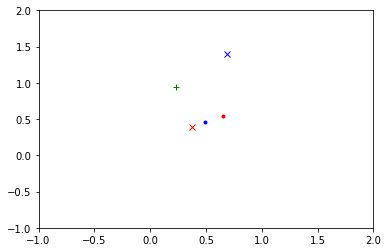

In [188]:


min_dim = np.argmin(abs(p1p2))
print(min_dim)
orth_vec = np.zeros(p1p2.shape)

sign = np.array([random.choice([-1,1]) for _ in p1p2])
p1p2_u = 1 - abs(p1p2 / scipy.linalg.norm(p1p2))
p1p2_u = p1p2_u / scipy.linalg.norm(p1p2)
orth_vec = np.multiply(p1p2_u, sign)

target_dist_from_proj = math.sqrt(d1**2-mag**2)
target_point = orth_vec*target_dist_from_proj + proj_point


plt.plot(vecs[0,0], vecs[0, 1], 'r.')
plt.plot(vecs[1, 0], vecs[1, 1], 'rx')
plt.plot(vecs[2,0], vecs[2,1], 'g+')
plt.plot(proj_point[0], proj_point[1], 'b.')
plt.plot(target_point[0], target_point[1], 'bx')
plt.xlim(-1, 2)
plt.ylim(-1, 2)



plt.show()